# **Qualified Leads Classification**


# **Get our environment set up**


In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from datetime import datetime 



In [65]:
from collections import Counter


In [66]:
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline


# **Read The Dataset**

In [67]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset (1).csv


In [68]:
import io
df = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.



## **Save a copy from the original data**

In [69]:
df_copy = df.copy()

# **Drop The Last Empty COls [  Unnamed: 11	 - Unnamed: 12	]**

In [70]:
df.drop("Unnamed: 11", axis=1, inplace=True)
df.drop("Unnamed: 12", axis=1, inplace=True)


In [71]:
df

,lead_id,customer_name,lead_mobile_network,message,lead_time,method_of_contact,ad_group,lead_source,campaign,location,low_qualified
0,22,Rajaa M.Mousa,Orange,message: Idea about the best area in Sheik Za...,2022-03-07 12:56:20.523509,generic form,none,google,dev_-_sodic,sodic october plaza,0
1,30,Sahar Shalaby,Vodafone,ad_id : 23843176891470664 \nform_id : 36774549...,2019-09-16 13:17:18.459000,facebook,o west - fb_creme de la creme_ cairo/giza_27-60,facebook,orascom - lead generation,o west,0
2,42,Mohamed,Vodafone,message:,2022-05-07 02:03:53.589687,generic form,gouna_-_properties,google,locations,el gouna for sale & resale,0
3,44,Maher Elnakib,Orange,ad_id : 23844249544660664 \nadset_id : 2384424...,2019-12-19 22:56:46.662000,facebook,new release north edge general with north coas...,facebook,city edge - lead generation,north edge,0
4,48,pierre,Vodafone,message:,2022-01-27 05:56:22.806753,top compounds form,none,google,dev_-_inertia_egypt,joulz,0
...,...,...,...,...,...,...,...,...,...,...,...
91124,101024,Abadi Ahmeed,Gulf,ad_id : 23850279525690562 \nadgroup_id : 23850...,2022-06-06 10:42:19.756014,facebook,the lakes bloomfields - khaleeji lookalike - n...,facebook,tatweer misr - lead generation - cooing 2 - new,mostakbal city villa offer,0
91125,101025,Nermine Elassey,Orange,ad_id : 23850531682810398 \nadgroup_id : 23850...,2022-06-06 10:45:44.002419,facebook,telal sahel - no targeting - north coast,facebook,roya - lead generation - cooing 3 - new,telal sahel,0
91126,101026,mohamed sherif,Orange,message:,2022-06-06 10:51:46.991162,generic form,waterway_branded_residences,google,dev_-_equity,the waterway branded residences,0
91127,101027,Ahmed Monir Mostafa Hosny,Orange,ad_id : 23850616546710398 \nadgroup_id : 23850...,2022-06-06 10:52:25.310426,facebook,telal sahel - gouna lookalike - north coast,facebook,roya - lead generation - cooing 3 - new,telal sahel,0


# **Explore the dataset**

In [72]:
features = df.columns[:-1].tolist()
features

['lead_id',
 'customer_name',
 'lead_mobile_network',
 'message',
 'lead_time',
 'method_of_contact',
 'ad_group',
 'lead_source',
 'campaign',
 'location']

In [73]:
#Check the shape of the data
df.shape


(91129, 11)

In [75]:
##Info about the data shape of data, type of individual columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91129 entries, 0 to 91128
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   lead_id              91129 non-null  int64 
 1   customer_name        91129 non-null  object
 2   lead_mobile_network  91128 non-null  object
 3   message              89091 non-null  object
 4   lead_time            91129 non-null  object
 5   method_of_contact    91129 non-null  object
 6   ad_group             91057 non-null  object
 7   lead_source          91129 non-null  object
 8   campaign             90349 non-null  object
 9   location             90980 non-null  object
 10  low_qualified        91129 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.6+ MB


In [74]:
#Check the data types
df.dtypes


lead_id                 int64
customer_name          object
lead_mobile_network    object
message                object
lead_time              object
method_of_contact      object
ad_group               object
lead_source            object
campaign               object
location               object
low_qualified          object
dtype: object

In [76]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
lead_id,91129.0,NaN,NaN,NaN,57588.002239,24631.285409,22.0,35871.0,58134.0,78400.0,101032.0
customer_name,91129,55232,Rubbish,847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_mobile_network,91128,10,Vodafone,39046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
message,89091,73237,message:,6882,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,91129,90993,2019-09-02 00:00:00.000000,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
method_of_contact,91129,134,facebook,48649,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ad_group,91057,2480,none,39835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_source,91129,125,facebook,51267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,90349,761,none,21601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,90980,3146,none,12962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Check Missing Data**

In [77]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,message,campaign,location,ad_group,lead_mobile_network,lead_id,customer_name,lead_time,method_of_contact,lead_source,low_qualified
Total,2038.00000,780.00000,149.000000,72.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
Percent,2.23639,0.85593,0.163504,0.079009,0.001097,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
df.isna().sum()


lead_id                   0
customer_name             0
lead_mobile_network       1
message                2038
lead_time                 0
method_of_contact         0
ad_group                 72
lead_source               0
campaign                780
location                149
low_qualified             0
dtype: int64

# Convert Categorical Features TO Numierics


Encode low_qualified

In [79]:
df.low_qualified = pd.to_numeric(df.low_qualified, errors='coerce')


In [80]:
df['low_qualified'] = df['low_qualified'].astype('Int64') # capital I


# Using Label Encoding TO Encode categorical Features

Another approach to encoding categorical values is to use a technique called label encoding. Label encoding is simply converting each value in a column to a number.

In [81]:
df["lead_mobile_network"].value_counts().to_frame()


,lead_mobile_network
Vodafone,39046
Orange,18071
Etisalat,16462
Gulf,12070
Others,2422
US_Canda,1149
Europe,1025
WE,881
?,1
hykjghk,1


In [82]:
df["lead_mobile_network"] = df["lead_mobile_network"].astype('category')
df["lead_mobile_network"]  = df["lead_mobile_network"] .cat.codes


In [83]:
df["method_of_contact"].value_counts().to_frame()


,method_of_contact
facebook,48649
generic form,9966
whatsapp,8444
phone,7877
top compounds form,5768
...,...
personal - abdel-azim,1
referral ghanima,1
cooing client,1
personal aly rafea,1


In [84]:
df["method_of_contact"] = df["method_of_contact"].astype('category')
df["method_of_contact"]  = df["method_of_contact"] .cat.codes


In [85]:
df["lead_source"].value_counts().to_frame()


,lead_source
facebook,51267
google,18095
website,5184
phone,2804
personal,1669
...,...
duckduckgo.com,1
management/referral (nada),1
ca.search.yahoo.com,1
realestatechamber-eg.com,1


In [86]:
df["lead_source"] = df["lead_source"].astype('category')
df["lead_source"]  = df["lead_source"] .cat.codes

In [105]:
df["campaign"].value_counts().to_frame()


,campaign
none,21601
(none),2784
google_cpc,2623
mountain view - lead generation - cooing 3,1586
emaar - lead generation - cooing 3,1431
...,...
sodic,1
al ahly sabbour - lead generation - cooing 1,1
cold call,1
"dev-orascom,dev_-_orascom",1


In [106]:
df["campaign"] = df["campaign"].astype('category')
df["campaign"]  = df["campaign"] .cat.codes

In [108]:
df["ad_group"].value_counts().to_frame()


,ad_group
none,39835
mountain view october - khaleeji lookalike 3%,995
mountain view october - general audience with investment/real estate interests,697
aura apartments - general audience real estate interests,550
the lakes bloomfields - khaleeji lookalike,473
...,...
zed west - new cairo & 6th of october lookalike,1
creek town - new cairo & 6th of october lookalike,1
october plaza - general audience with real estate interests,1
telal sokhna - frequent international travelers 25-34 cairo,1


In [109]:
df["ad_group"] = df["ad_group"].astype('category')
df["ad_group"]  = df["ad_group"] .cat.codes

In [110]:
df.dtypes

lead_id                         int64
customer_name                  object
Month                           Int64
Year                            Int64
lead_mobile_network              int8
message                        object
lead_time              datetime64[ns]
method_of_contact               int16
ad_group                        int16
lead_source                      int8
campaign                        int16
location                       object
low_qualified                   Int64
dtype: object

# Extract date form dat

In [88]:

df['lead_time'] = pd.to_datetime(df['lead_time'], errors='coerce')


In [97]:
#df.insert(5,"Day", df.lead_time.dt.day)
df.insert(2, "Month", df.lead_time.dt.month)
df.insert(3, "Year", df.lead_time.dt.year)


In [98]:
#df['Day'] = df['Day'].astype('Int64')
df['Month'] = df['Month'].astype('Int64')
df['Year'] = df['Year'].astype('Int64')

In [171]:
df

,lead_id,customer_name,Month,Year,lead_mobile_network,message,lead_time,method_of_contact,ad_group,lead_source,campaign,location,low_qualified
0,22,Rajaa M.Mousa,3,2022,4,message: Idea about the best area in Sheik Za...,2022-03-07 12:56:20.523509,50,1537,35,229,sodic october plaza,0
1,30,Sahar Shalaby,9,2019,7,ad_id : 23843176891470664 \nform_id : 36774549...,2019-09-16 13:17:18.459000,36,1567,30,570,o west,0
2,42,Mohamed,5,2022,7,message:,2022-05-07 02:03:53.589687,50,823,35,435,el gouna for sale & resale,0
3,44,Maher Elnakib,12,2019,4,ad_id : 23844249544660664 \nadset_id : 2384424...,2019-12-19 22:56:46.662000,36,1526,30,94,north edge,0
4,48,pierre,1,2022,7,message:,2022-01-27 05:56:22.806753,118,1537,35,183,joulz,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91124,101024,Abadi Ahmeed,6,2022,3,ad_id : 23850279525690562 \nadgroup_id : 23850...,2022-06-06 10:42:19.756014,36,2179,30,714,mostakbal city villa offer,0
91125,101025,Nermine Elassey,6,2022,4,ad_id : 23850531682810398 \nadgroup_id : 23850...,2022-06-06 10:45:44.002419,36,2039,30,642,telal sahel,0
91126,101026,mohamed sherif,6,2022,4,message:,2022-06-06 10:51:46.991162,50,2340,35,176,the waterway branded residences,0
91127,101027,Ahmed Monir Mostafa Hosny,6,2022,4,ad_id : 23850616546710398 \nadgroup_id : 23850...,2022-06-06 10:52:25.310426,36,2036,30,642,telal sahel,0


In [305]:
cleaned_df = df[['lead_id', 'Month','Year', 'lead_mobile_network', 'method_of_contact', 'lead_source', 'ad_group', 'campaign','location','low_qualified']]
cleaned_df

,lead_id,Month,Year,lead_mobile_network,method_of_contact,lead_source,ad_group,campaign,location,low_qualified
0,22,3,2022,4,50,35,1537,229,sodic october plaza,0
1,30,9,2019,7,36,30,1567,570,o west,0
2,42,5,2022,7,50,35,823,435,el gouna for sale & resale,0
3,44,12,2019,4,36,30,1526,94,north edge,0
4,48,1,2022,7,118,35,1537,183,joulz,0
...,...,...,...,...,...,...,...,...,...,...
91124,101024,6,2022,3,36,30,2179,714,mostakbal city villa offer,0
91125,101025,6,2022,4,36,30,2039,642,telal sahel,0
91126,101026,6,2022,4,50,35,2340,176,the waterway branded residences,0
91127,101027,6,2022,4,36,30,2036,642,telal sahel,0


In [306]:
total = cleaned_df.isnull().sum().sort_values(ascending = False)
percent = (cleaned_df.isnull().sum()/cleaned_df.isnull().count()).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,location,Month,Year,low_qualified,lead_id,lead_mobile_network,method_of_contact,lead_source,ad_group,campaign
Total,149.000000,8.000000,8.000000,8.000000,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.001635,0.000088,0.000088,0.000088,0.0,0.0,0.0,0.0,0.0,0.0


# **Empute Missing Vlaues**

In [307]:
cleaned_df = cleaned_df.fillna(0).astype(np.int64, errors='ignore')


In [308]:
missing_col = ['Month','Year','low_qualified']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 cleaned_df.loc[cleaned_df.loc[:,i].isnull(),i]=cleaned_df.loc[:,i].mean()

In [309]:
total = cleaned_df.isnull().sum().sort_values(ascending = False)
percent = (cleaned_df.isnull().sum()/cleaned_df.isnull().count()).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,lead_id,Month,Year,lead_mobile_network,method_of_contact,lead_source,ad_group,campaign,location,low_qualified
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [310]:
cleaned_df.isna().sum()


lead_id                0
Month                  0
Year                   0
lead_mobile_network    0
method_of_contact      0
lead_source            0
ad_group               0
campaign               0
location               0
low_qualified          0
dtype: int64

In [311]:
cleaned_df.dtypes

lead_id                  int64
Month                  float64
Year                   float64
lead_mobile_network      int64
method_of_contact        int64
lead_source              int64
ad_group                 int64
campaign                 int64
location                object
low_qualified          float64
dtype: object

In [312]:
cleaned_df['Month'] = cleaned_df['Month'].astype('Int64')
cleaned_df['Year'] = cleaned_df['Year'].astype('Int64')
cleaned_df['low_qualified'] = cleaned_df['low_qualified'].astype('Int64')
cleaned_df['lead_source'] = cleaned_df['lead_source'].astype('Int64')
cleaned_df['ad_group'] = cleaned_df['ad_group'].astype('Int64')

In [313]:
cleaned_df.dtypes

lead_id                 int64
Month                   Int64
Year                    Int64
lead_mobile_network     int64
method_of_contact       int64
lead_source             Int64
ad_group                Int64
campaign                int64
location               object
low_qualified           Int64
dtype: object

In [314]:
#Zero is used to represent false, and One is used to represent true. 

# separate the qualified_leads and low_qualified_leads to look into differences between them.

In [315]:
qualified_leads=df[cleaned_df.low_qualified==0]
qualified_leads

,lead_id,customer_name,Month,Year,lead_mobile_network,message,lead_time,method_of_contact,ad_group,lead_source,campaign,location,low_qualified
0,22,Rajaa M.Mousa,3,2022,4,message: Idea about the best area in Sheik Za...,2022-03-07 12:56:20.523509,50,1537,35,229,sodic october plaza,0
1,30,Sahar Shalaby,9,2019,7,ad_id : 23843176891470664 \nform_id : 36774549...,2019-09-16 13:17:18.459000,36,1567,30,570,o west,0
2,42,Mohamed,5,2022,7,message:,2022-05-07 02:03:53.589687,50,823,35,435,el gouna for sale & resale,0
3,44,Maher Elnakib,12,2019,4,ad_id : 23844249544660664 \nadset_id : 2384424...,2019-12-19 22:56:46.662000,36,1526,30,94,north edge,0
4,48,pierre,1,2022,7,message:,2022-01-27 05:56:22.806753,118,1537,35,183,joulz,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91124,101024,Abadi Ahmeed,6,2022,3,ad_id : 23850279525690562 \nadgroup_id : 23850...,2022-06-06 10:42:19.756014,36,2179,30,714,mostakbal city villa offer,0
91125,101025,Nermine Elassey,6,2022,4,ad_id : 23850531682810398 \nadgroup_id : 23850...,2022-06-06 10:45:44.002419,36,2039,30,642,telal sahel,0
91126,101026,mohamed sherif,6,2022,4,message:,2022-06-06 10:51:46.991162,50,2340,35,176,the waterway branded residences,0
91127,101027,Ahmed Monir Mostafa Hosny,6,2022,4,ad_id : 23850616546710398 \nadgroup_id : 23850...,2022-06-06 10:52:25.310426,36,2036,30,642,telal sahel,0


In [316]:
qualified_leads=cleaned_df[cleaned_df.low_qualified==0]
qualified_leads

,lead_id,Month,Year,lead_mobile_network,method_of_contact,lead_source,ad_group,campaign,location,low_qualified
0,22,3,2022,4,50,35,1537,229,sodic october plaza,0
1,30,9,2019,7,36,30,1567,570,o west,0
2,42,5,2022,7,50,35,823,435,el gouna for sale & resale,0
3,44,12,2019,4,36,30,1526,94,north edge,0
4,48,1,2022,7,118,35,1537,183,joulz,0
...,...,...,...,...,...,...,...,...,...,...
91124,101024,6,2022,3,36,30,2179,714,mostakbal city villa offer,0
91125,101025,6,2022,4,36,30,2039,642,telal sahel,0
91126,101026,6,2022,4,50,35,2340,176,the waterway branded residences,0
91127,101027,6,2022,4,36,30,2036,642,telal sahel,0


In [317]:
low_qualified_leads=df[cleaned_df.low_qualified==1]
low_qualified_leads

,lead_id,customer_name,Month,Year,lead_mobile_network,message,lead_time,method_of_contact,ad_group,lead_source,campaign,location,low_qualified
7,70,Gaber youssef,10,2021,7,location : https://old.nawy.com/prime-compound...,2021-10-03 21:58:29.602753,50,1537,35,229,sodic villette new cairo,1
110,995,نهي الكفافي,3,2022,7,message:,2022-03-13 23:48:05.343299,127,1537,117,655,maadi,1
111,998,Unknown,12,2021,7,Called at 6:09 but did not receive the call on...,2021-12-05 16:09:05.114939,99,1537,87,549,none,1
112,998,Unknown,12,2021,7,Called at 6:09 but did not receive the call on...,2021-12-05 16:19:38.698440,99,1537,87,549,none,1
113,998,Unknown,12,2021,7,"Called back now , no answer",2021-12-05 18:38:38.135197,99,1537,87,549,none,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90963,100835,Mohamed Moussa,6,2022,7,ad_id : 23850293639620664 \nadgroup_id : 23850...,2022-06-05 16:34:41.624628,36,2182,30,713,mostakbal city villa offer,1
90981,100856,Rubbish,6,2022,5,"Ended the call when I answered, tried to call ...",2022-06-05 18:22:18.446796,99,1537,87,549,none,1
91017,100898,Rubbish,6,2022,7,"Called out of working hours, called back twice...",2022-06-05 21:23:17.394212,99,1537,87,549,none,1
91045,100933,Ahmed Pilot,6,2022,7,ad_id : 23850671238270398 \nadgroup_id : 23850...,2022-06-05 23:49:17.972762,36,188,30,448,azha north,1


In [318]:
low_qualified_leads=cleaned_df[cleaned_df.low_qualified==1]
low_qualified_leads

,lead_id,Month,Year,lead_mobile_network,method_of_contact,lead_source,ad_group,campaign,location,low_qualified
7,70,10,2021,7,50,35,1537,229,sodic villette new cairo,1
110,995,3,2022,7,127,117,1537,655,maadi,1
111,998,12,2021,7,99,87,1537,549,none,1
112,998,12,2021,7,99,87,1537,549,none,1
113,998,12,2021,7,99,87,1537,549,none,1
...,...,...,...,...,...,...,...,...,...,...
90963,100835,6,2022,7,36,30,2182,713,mostakbal city villa offer,1
90981,100856,6,2022,5,99,87,1537,549,none,1
91017,100898,6,2022,7,99,87,1537,549,none,1
91045,100933,6,2022,7,36,30,188,448,azha north,1


## **Drop Duplicates**

In [319]:
cleaned_df.duplicated().value_counts()


False    87063
True      4066
dtype: int64

In [320]:
cleaned_df[cleaned_df.low_qualified==0].duplicated().value_counts()


False    72529
True      2615
dtype: int64

In [321]:
cleaned_df[cleaned_df.low_qualified==1].duplicated().value_counts()


False    14534
True      1451
dtype: int64

In [322]:
cleaned_df.drop_duplicates(inplace=True)


In [323]:
cleaned_df.duplicated().value_counts()


False    87063
dtype: int64

# **Handling Outliers**

In [324]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
seed(1)
# generate univariate observations
data =cleaned_df["low_qualified"]
# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 14534
Non-outlier observations: 72529


# **Data Unbalance**

Let's check data unbalance with respect with target value, i.e. low_qualified.



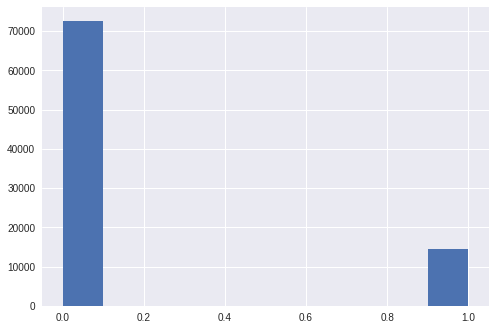

In [325]:
cleaned_df['low_qualified'].hist()

In [326]:
cleaned_df['low_qualified'].value_counts(normalize=True)


0    0.833063
1    0.166937
Name: low_qualified, dtype: Float64

## **Data exploration**

Qualified Leads VS Time

In [327]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import missingno as msno


In [328]:
cleaned_df['low_qualified'].isnull().values.any()


False

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

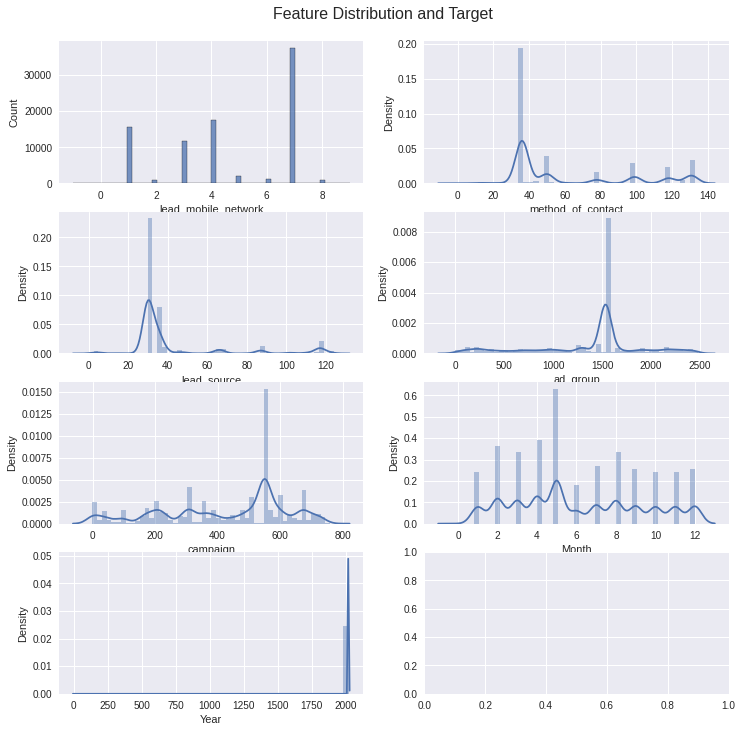

In [329]:
plt.style.use('seaborn')

# create subplot contain 6 plots (2 plot for 3 rows)
fig, ax = plt.subplots(4,2, figsize=(12,12))

# set title for figure
fig.suptitle('Feature Distribution and Target', fontsize=16, y=0.92)

# draw histogram for feature and  best fit line.
sns.histplot(cleaned_df.lead_mobile_network, ax=ax[0][0])
sns.distplot(cleaned_df.method_of_contact, ax=ax[0][1])
sns.distplot(cleaned_df.lead_source, ax=ax[1][0])
sns.distplot(cleaned_df.ad_group, ax=ax[1][1])
sns.distplot(cleaned_df.campaign, ax=ax[2][0])
sns.distplot(cleaned_df.Month, ax=ax[2][1])
sns.distplot(cleaned_df.Year, ax=ax[3][0])
plt.show()

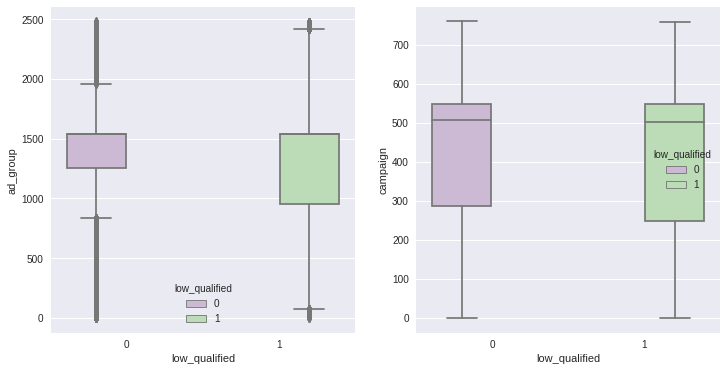

In [330]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="low_qualified", y="ad_group", hue="low_qualified",data=cleaned_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="low_qualified", y="campaign", hue="low_qualified",data=cleaned_df, palette="PRGn",showfliers=False)
plt.show();

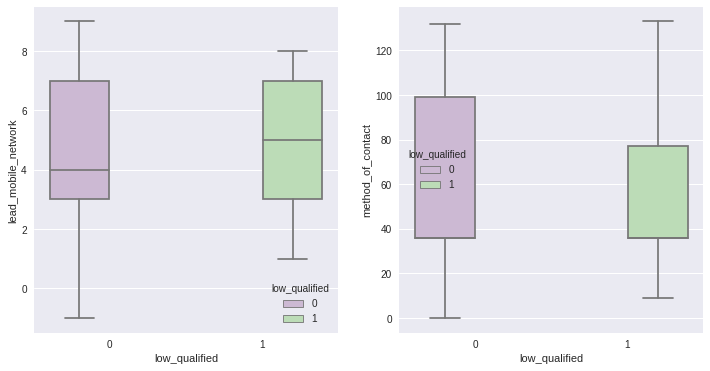

In [331]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="low_qualified", y="lead_mobile_network", hue="low_qualified",data=cleaned_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="low_qualified", y="method_of_contact", hue="low_qualified",data=cleaned_df, palette="PRGn",showfliers=False)
plt.show();

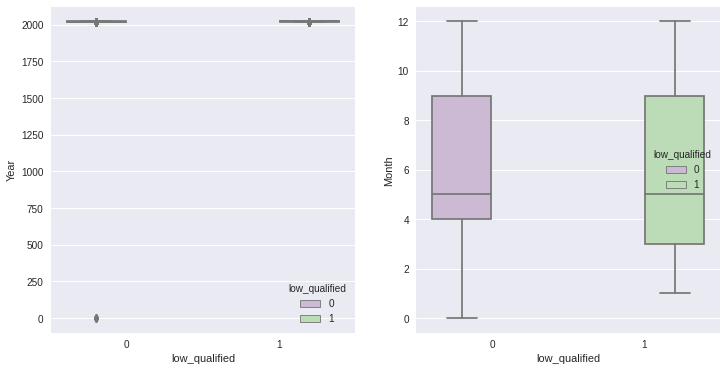

In [332]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="low_qualified", y="Year", hue="low_qualified",data=cleaned_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="low_qualified", y="Month", hue="low_qualified",data=cleaned_df, palette="PRGn",showfliers=False)
plt.show();

## Let's go ahead an look at the distribution of the different features of this dataset.

In [333]:
cols = cleaned_df.columns
cols

Index(['lead_id', 'Month', 'Year', 'lead_mobile_network', 'method_of_contact',
       'lead_source', 'ad_group', 'campaign', 'location', 'low_qualified'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



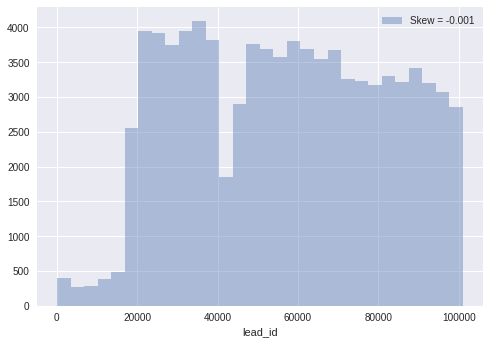

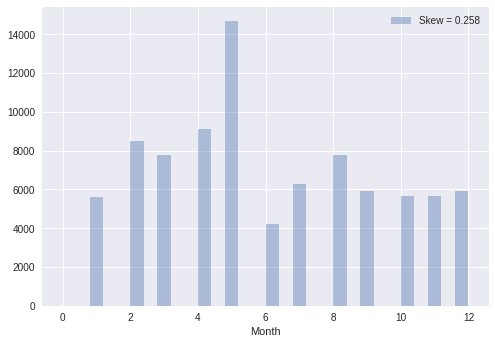

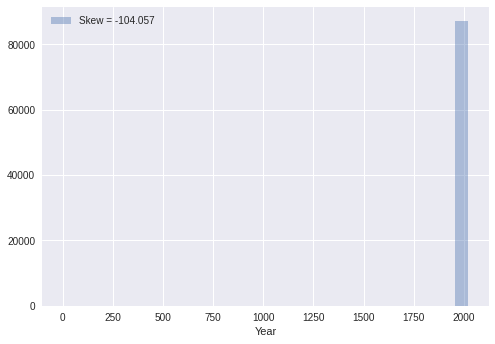

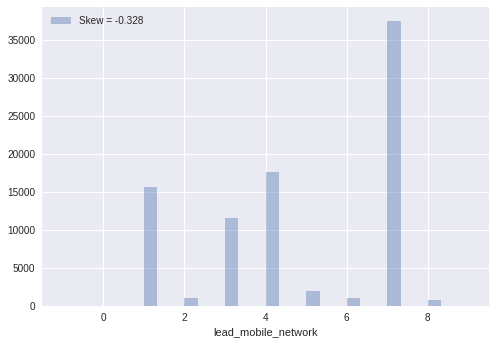

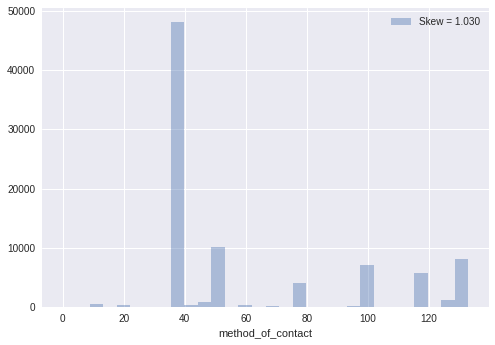

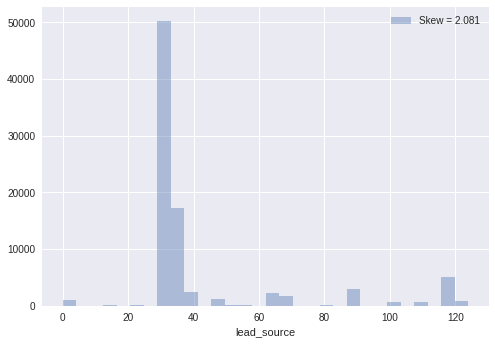

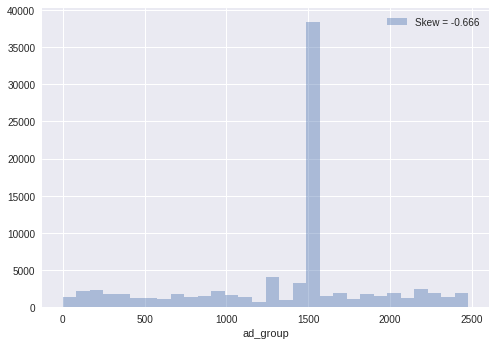

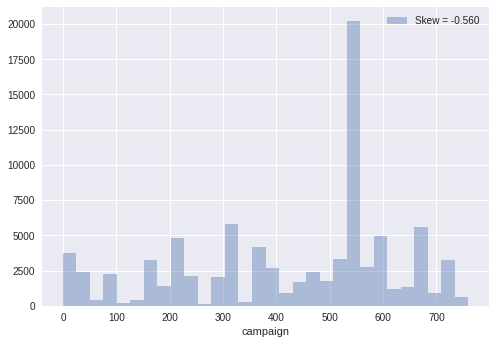

TypeError: ignored

In [334]:
for feat in cols:
    skew = cleaned_df[feat].skew()
    sns.distplot(cleaned_df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

## Let's now proceed by drawing a pairplot to visually examine the correlation between the features.

In [335]:
df1Corr=pd.DataFrame(cleaned_df.corr().unstack().sort_values(ascending=False)['low_qualified'],
                     columns=['Correlation to the target'])
df1Corr

,Correlation to the target
low_qualified,1.000000
lead_id,0.115263
Year,0.008960
lead_mobile_network,-0.000830
campaign,-0.008152
lead_source,-0.040200
method_of_contact,-0.042372
ad_group,-0.042945
Month,-0.052314


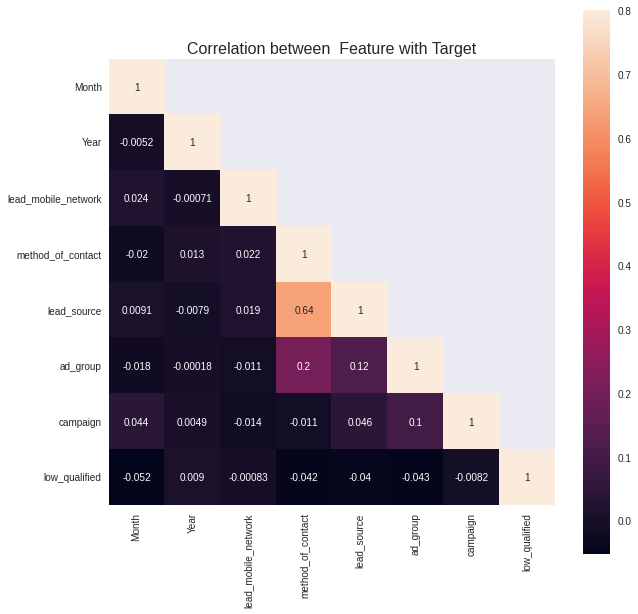

In [336]:
# list of continuous feature
columns =[ 'Month', 'Year', 'lead_mobile_network', 'method_of_contact',
       'lead_source', 'ad_group', 'campaign', 'low_qualified']
# calculate correlation matrix.
corrMatt = cleaned_df[columns].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
g = sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True, )
g.set_title("Correlation between  Feature with Target", fontsize=16, y=1.05)
plt.show()

<Figure size 576x576 with 0 Axes>

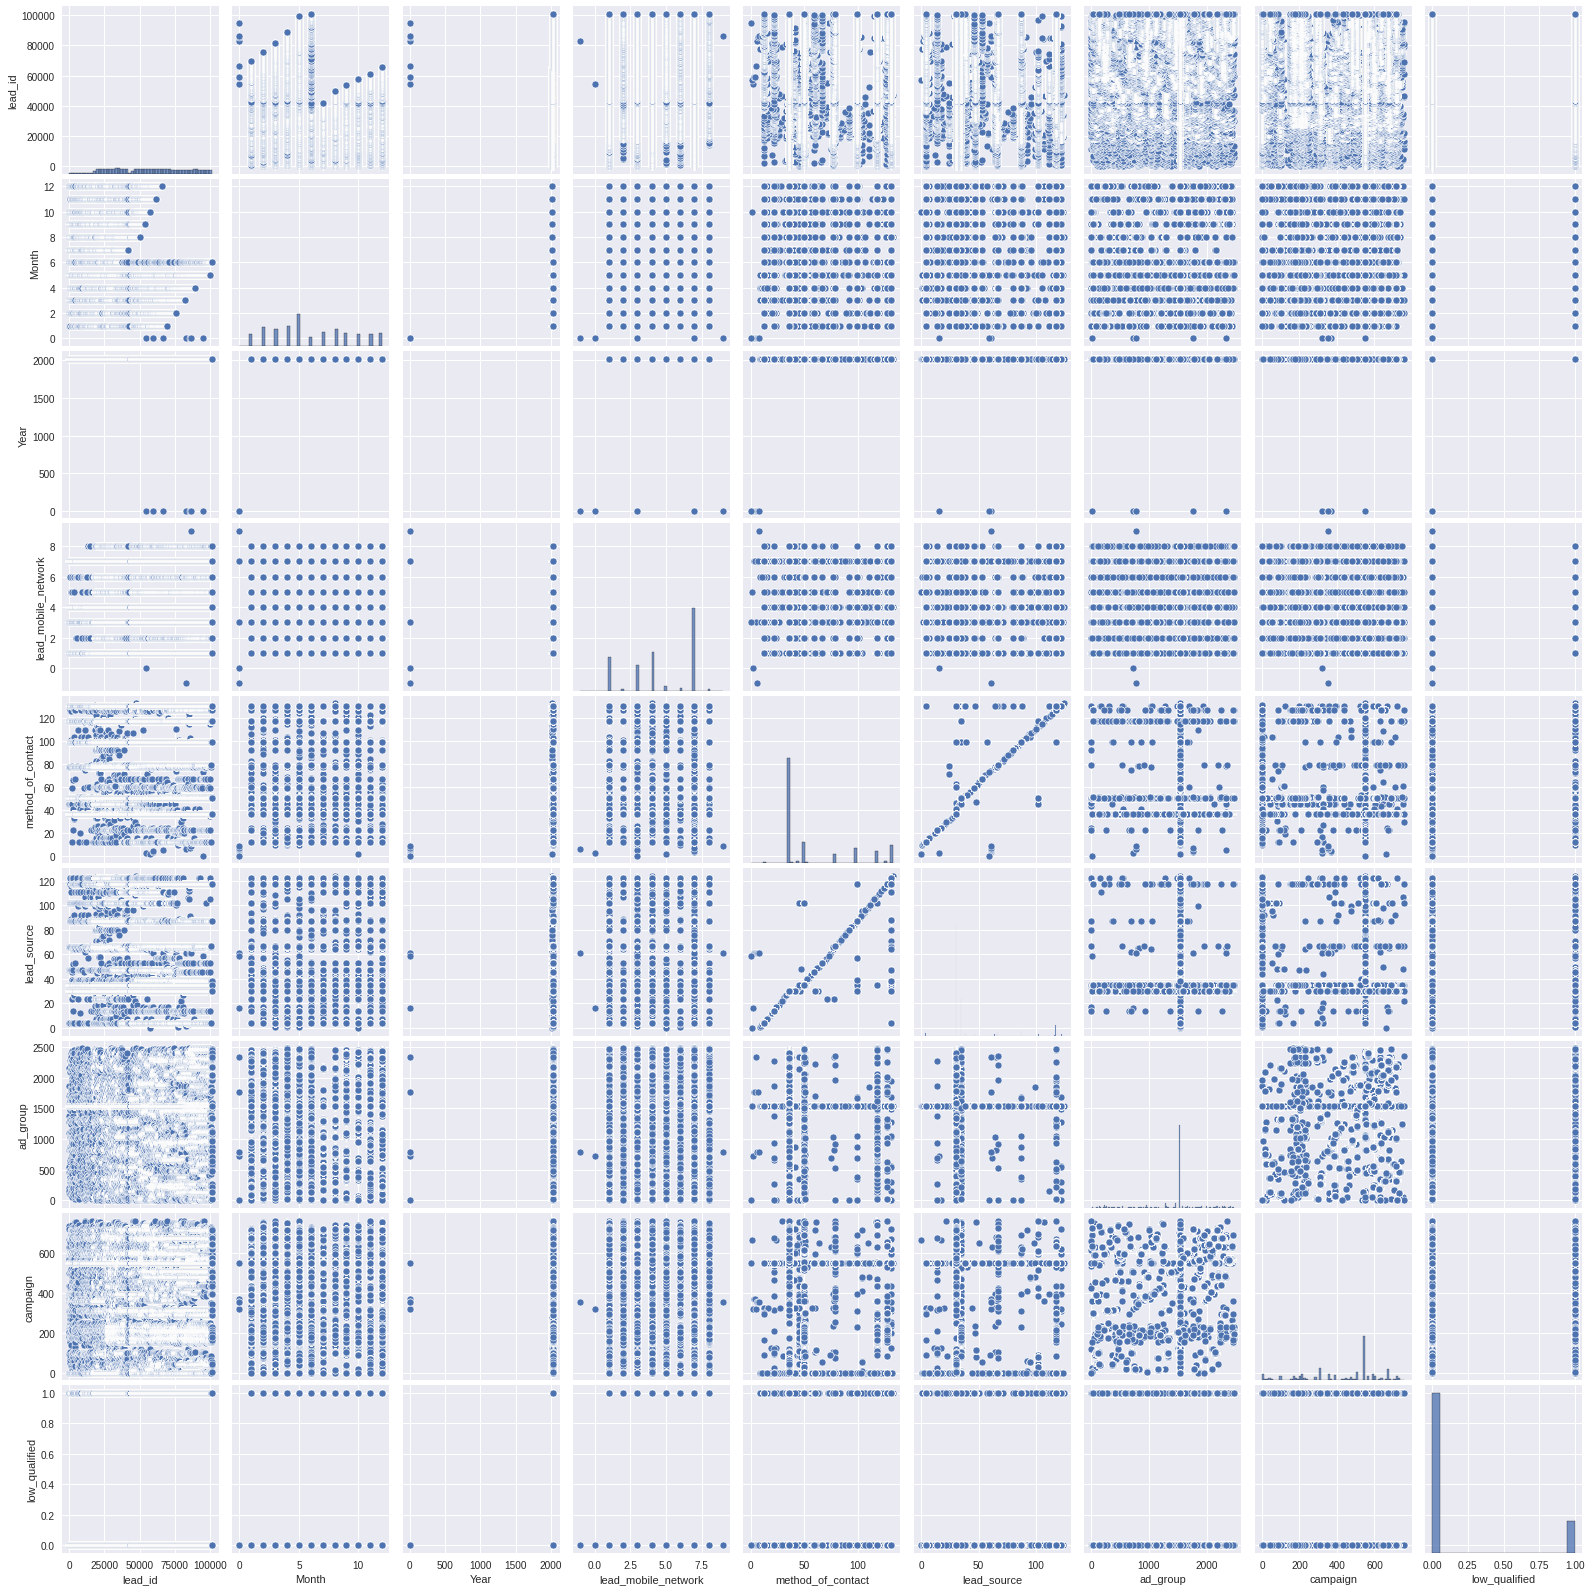

In [337]:
plt.figure(figsize=(8,8))
sns.pairplot(cleaned_df[cols],palette='coolwarm')
plt.show()

In [338]:
highrenteddays=pd.DataFrame(cleaned_df.groupby('lead_mobile_network').sum()['low_qualified'].sort_values(ascending=False))
highrenteddays

,low_qualified
lead_mobile_network,
7,6613
1,3376
4,2630
3,1081
5,520
8,179
6,68
2,67
-1,0


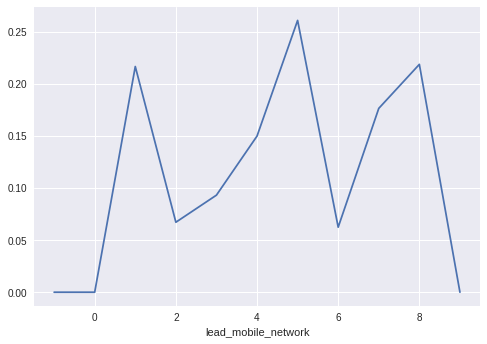

In [340]:

cleaned_df.groupby('lead_mobile_network').mean()['low_qualified'].plot()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



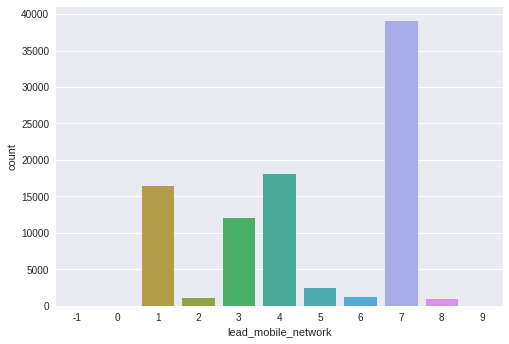

In [341]:
sns.countplot(df['lead_mobile_network'])
plt.show()

# Split data in train, test and validation set¶

In [357]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [358]:

# Remove 'id' and 'target' columns
labels = cleaned_df.columns[:-1]

X = cleaned_df[labels]
y = cleaned_df['low_qualified']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

